We first need to make some imports.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## The Model

We consider an infinite time horizon $ t=0, 1, 2, 3.. $ At $ t=0 $ the agent is given a complete cake with size $ \bar x $. Let $ x_t $ denote the size of the cake at the beginning of each period,
so that, in particular, $ x_0=\bar x $. We choose how much of the cake to eat in any given period $ t $. After choosing to consume $ c_t $ of the cake in period $ t $ there is

$$
x_{t+1} = x_t - c_t
$$

left in period $ t+1 $. Consuming quantity $ c $ of the cake gives current utility $ u(c) $. We adopt the CRRA utility function

<a id='equation-crra-utility'></a>
$$
u(c) = \frac{c^{1-\gamma}}{1-\gamma} \qquad (\gamma \gt 0, \, \gamma \neq 1) \tag{43.1}
$$

In Python this is

In [2]:
def u(c, gamma):

    return c**(1 - gamma) / (1 - gamma)

Future cake consumption utility is discounted according to $ \beta\in(0, 1) $. In particular, consumption of $ c $ units $ t $ periods hence has present value $ \beta^t u(c) $ The agent’s problem can be written as


<a id='equation-cake-objective'></a>
$$
\max_{\{c_t\}} \sum_{t=0}^\infty \beta^t u(c_t) \tag{43.2}
$$

subject to


<a id='equation-cake-feasible'></a>
$$
x_{t+1} = x_t - c_t
\quad \text{and} \quad
0\leq c_t\leq x_t \tag{43.3}
$$

for all $ t $.

A consumption path $ \{c_t\} $ satisfying [(43.3)](#equation-cake-feasible) where
$ x_0 = \bar x $ is called **feasible**.

In this problem, the following terminology is standard: $ x_t $ is called the **state variable** $ c_t $ is called the **control variable** or the **action** $ \beta $ and $ \gamma $ are **parameters**  

### Trade-Off

The key trade-off in the cake-eating problem is this:

- Delaying consumption is costly because of the discount factor.  
- But delaying some consumption is also attractive because $ u $ is concave.  


The concavity of $ u $ implies that the consumer gains value from
*consumption smoothing*, which means spreading consumption out over time.

This is because concavity implies diminishing marginal utility—a progressively smaller gain in utility for each additional spoonful of cake consumed within one period.

## The Value Function

The first step of our dynamic programming treatment is to obtain the Bellman
equation.

The next step is to use it to calculate the solution.

### The Bellman Equation

To this end, we let $ v(x) $ be maximum lifetime utility attainable from
the current time when $ x $ units of cake are left.

That is,


<a id='equation-value-fun'></a>
$$
v(x) = \max \sum_{t=0}^{\infty} \beta^t u(c_t) \tag{43.4}
$$

where the maximization is over all paths $ \{ c_t \} $ that are feasible
from $ x_0 = x $.

At this point, we do not have an expression for $ v $, but we can still
make inferences about it.

For example, as was the case with the [McCall model](https://python.quantecon.org/mccall_model.html), the
value function will satisfy a version of the *Bellman equation*.

In the present case, this equation states that $ v $ satisfies


<a id='equation-bellman-cep'></a>
$$
v(x) = \max_{0\leq c \leq x} \{u(c) + \beta v(x-c)\}
\quad \text{for any given } x \geq 0. \tag{43.5}
$$

The intuition here is essentially the same it was for the McCall model.

Choosing $ c $ optimally means trading off current vs future rewards.

Current rewards from choice $ c $ are just $ u(c) $.

Future rewards given current cake size $ x $, measured from next period and
assuming optimal behavior, are $ v(x-c) $.

These are the two terms on the right hand side of [(43.5)](#equation-bellman-cep), after
suitable discounting.

If $ c $ is chosen optimally using this trade off strategy, then we obtain maximal lifetime rewards from our current state $ x $.

Hence, $ v(x) $ equals the right hand side of [(43.5)](#equation-bellman-cep), as claimed.

### An Analytical Solution

It has been shown that, with $ u $ as the CRRA utility function in
[(43.1)](#equation-crra-utility), the function


<a id='equation-crra-vstar'></a>
$$
v^*(x_t) = \left( 1-\beta^{1/\gamma} \right)^{-\gamma}u(x_t) \tag{43.6}
$$

solves the Bellman equation and hence is equal to the value function.

You are asked to confirm that this is true in the exercises below.

The solution [(43.6)](#equation-crra-vstar) depends heavily on the CRRA utility function.

In fact, if we move away from CRRA utility, usually there is no analytical
solution at all.

In other words, beyond CRRA utility, we know that the value function still
satisfies the Bellman equation, but we do not have a way of writing it
explicitly, as a function of the state variable and the parameters.

We will deal with that situation numerically when the time comes.

Here is a Python representation of the value function:

In [12]:
def v_star(x,beta,gamma):
    return (1-beta**(1/gamma)**(-gamma)*u(x,gamma))

Plots...

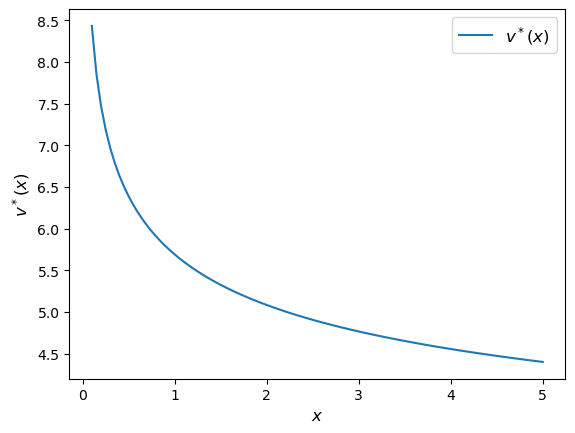

In [11]:
beta, gamma = 0.95, 1.2
x_grid = np.linspace(0.1,5,100) #This is like the kgrid from Adams lecture. Initial final and step

fig, ax = plt.subplots()

ax.plot(x_grid, v_star(x_grid,beta,gamma),label="$v^*(x)$")
ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$v^*(x)$", fontsize=12)
ax.legend(fontsize=12)

plt.show()

## The Optimal Policy

Now that we have the value function, it is straightforward to calculate the
optimal action at each state.

We should choose consumption to maximize the
right hand side of the Bellman equation [(43.5)](#equation-bellman-cep).

$$
c^* = \arg \max_{c} \{u(c) + \beta v(x - c)\}
$$

We can think of this optimal choice as a function of the state $ x $, in
which case we call it the **optimal policy**.

We denote the optimal policy by $ \sigma^* $, so that

$$
\sigma^*(x) := \arg \max_{c} \{u(c) + \beta v(x - c)\}
\quad \text{for all } x
$$

If we plug the analytical expression [(43.6)](#equation-crra-vstar) for the value function
into the right hand side and compute the optimum, we find that


<a id='equation-crra-opt-pol'></a>
$$
\sigma^*(x) = \left( 1-\beta^{1/\gamma} \right) x \tag{43.7}
$$

Now let’s recall our intuition on the impact of parameters. We guessed that the consumption rate would be decreasing in both parameters. This is in fact the case, as can be seen from [(43.7)](#equation-crra-opt-pol). Here’s some plots that illustrate.

In [14]:
def c_star(x,beta,gamma):
    return (1-beta**(1/gamma))*x

Plotting the policy...

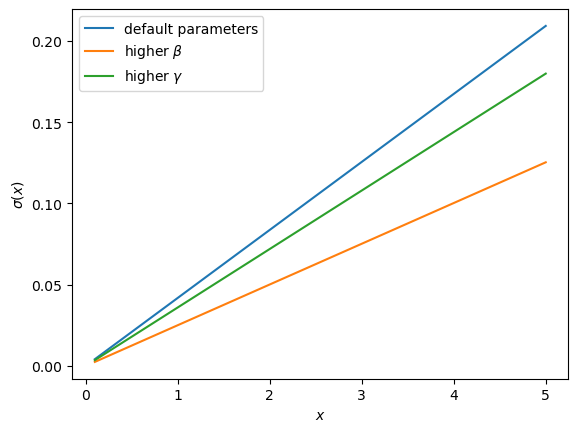

In [16]:
fig, ax = plt.subplots()
ax.plot(x_grid, c_star(x_grid, beta, gamma), label='default parameters')
ax.plot(x_grid, c_star(x_grid, beta + 0.02, gamma), label=r'higher $\beta$')
ax.plot(x_grid, c_star(x_grid, beta, gamma + 0.2), label=r'higher $\gamma$')
ax.set_ylabel(r'$\sigma(x)$')
ax.set_xlabel('$x$')
ax.legend()

plt.show()